In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(cities[0])
len(cities)


bardiyah


596

In [6]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):    # DEBUG
    
    # group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_response = requests.get(city_url)
        if city_response.status_code != 200:
            print(f"City not found with {city_response.status_code} for url {city_url}")
            continue
                         
        city_weather = city_response.json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as err:
        print(f"unexpected error {type(err)} {err} found for url {city_url}")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardiyah
Processing Record 2 of Set 1 | mbandaka
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | motygino
Processing Record 6 of Set 1 | mys shmidta
City not found with 404 for url http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133d84e687a803d03a38e0fa498576cc&q=mys+shmidta
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | marsa matruh
Processing Record 9 of Set 1 | taolanaro
City not found with 404 for url http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133d84e687a803d03a38e0fa498576cc&q=taolanaro
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | cururupu
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | umzimvubu
City not found with 404 for url http://ap

Processing Record 6 of Set 4 | giyani
Processing Record 7 of Set 4 | orange cove
Processing Record 8 of Set 4 | mathbaria
Processing Record 9 of Set 4 | herat
Processing Record 10 of Set 4 | senanga
Processing Record 11 of Set 4 | castro
Processing Record 12 of Set 4 | moffat
Processing Record 13 of Set 4 | concarneau
Processing Record 14 of Set 4 | tuatapere
Processing Record 15 of Set 4 | hasaki
Processing Record 16 of Set 4 | petauke
Processing Record 17 of Set 4 | isabela
Processing Record 18 of Set 4 | alihe
Processing Record 19 of Set 4 | srednekolymsk
Processing Record 20 of Set 4 | wenling
Processing Record 21 of Set 4 | chunskiy
Processing Record 22 of Set 4 | pisco
Processing Record 23 of Set 4 | honiara
Processing Record 24 of Set 4 | shuiji
Processing Record 25 of Set 4 | sentyabrskiy
City not found with 404 for url http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133d84e687a803d03a38e0fa498576cc&q=sentyabrskiy
Processing Record 26 of Set 4 | attawapiskat

Processing Record 18 of Set 7 | saldanha
Processing Record 19 of Set 7 | praia da vitoria
Processing Record 20 of Set 7 | djibo
Processing Record 21 of Set 7 | bobrovytsya
Processing Record 22 of Set 7 | mirador
Processing Record 23 of Set 7 | tunceli
Processing Record 24 of Set 7 | arkhara
Processing Record 25 of Set 7 | chimore
Processing Record 26 of Set 7 | caravelas
Processing Record 27 of Set 7 | fort nelson
Processing Record 28 of Set 7 | carberry
Processing Record 29 of Set 7 | loikaw
Processing Record 30 of Set 7 | salinas
Processing Record 31 of Set 7 | roald
Processing Record 32 of Set 7 | nouadhibou
Processing Record 33 of Set 7 | bathsheba
Processing Record 34 of Set 7 | kaputa
Processing Record 35 of Set 7 | amderma
City not found with 404 for url http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133d84e687a803d03a38e0fa498576cc&q=amderma
Processing Record 36 of Set 7 | arman
Processing Record 37 of Set 7 | yar-sale
Processing Record 38 of Set 7 | muisne

Processing Record 34 of Set 10 | svetlogorsk
Processing Record 35 of Set 10 | pierre
Processing Record 36 of Set 10 | hambantota
Processing Record 37 of Set 10 | oshnaviyeh
Processing Record 38 of Set 10 | ilula
Processing Record 39 of Set 10 | vestmannaeyjar
Processing Record 40 of Set 10 | el alto
Processing Record 41 of Set 10 | khawhai
Processing Record 42 of Set 10 | krasnokamensk
Processing Record 43 of Set 10 | mormugao
Processing Record 44 of Set 10 | grindavik
Processing Record 45 of Set 10 | sindand
City not found with 404 for url http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133d84e687a803d03a38e0fa498576cc&q=sindand
Processing Record 46 of Set 10 | soc trang
Processing Record 47 of Set 10 | tilichiki
Processing Record 48 of Set 10 | perry
Processing Record 49 of Set 10 | khandbari
Processing Record 50 of Set 10 | barao de melgaco
Processing Record 1 of Set 11 | okhotsk
Processing Record 2 of Set 11 | mindelo
Processing Record 3 of Set 11 | bilma
Proces

In [7]:
len(city_data)

557

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bardiyah,31.7561,25.0865,70.29,75,67,14.29,LY,2021-10-25 21:56:04
1,Mbandaka,0.0487,18.2603,71.53,87,77,3.18,CD,2021-10-25 21:56:04
2,Albany,42.6001,-73.9662,55.94,90,100,3.27,US,2021-10-25 21:54:16
3,Chokurdakh,70.6333,147.9167,-23.42,100,97,1.77,RU,2021-10-25 21:56:04
4,Motygino,58.1831,94.7592,40.80,75,98,15.86,RU,2021-10-25 21:56:05


In [9]:
#reorder df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bardiyah,LY,2021-10-25 21:56:04,31.7561,25.0865,70.29,75,67,14.29
1,Mbandaka,CD,2021-10-25 21:56:04,0.0487,18.2603,71.53,87,77,3.18
2,Albany,US,2021-10-25 21:54:16,42.6001,-73.9662,55.94,90,100,3.27
3,Chokurdakh,RU,2021-10-25 21:56:04,70.6333,147.9167,-23.42,100,97,1.77
4,Motygino,RU,2021-10-25 21:56:05,58.1831,94.7592,40.80,75,98,15.86


In [10]:
# create output file (csv)
output_data_file = "weather_data/cities.csv"
# export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# extract fields from the df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

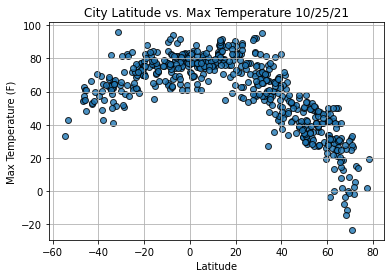

In [12]:
# build the scatter plot for latitidue vs max temp
plt.scatter(lats,
            max_temps,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

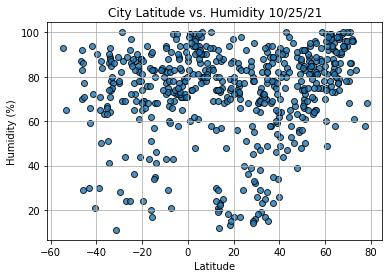

In [13]:
# build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

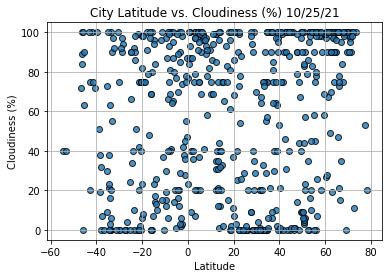

In [14]:
# build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

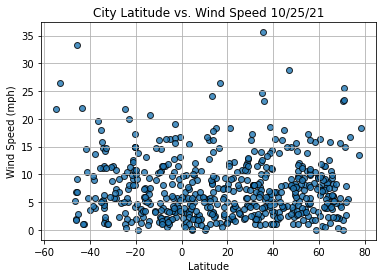

In [15]:
# build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [16]:
# create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemispher weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y Values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [17]:
# create norther and southern hemisphere dfs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bardiyah,LY,2021-10-25 21:56:04,31.7561,25.0865,70.29,75,67,14.29
1,Mbandaka,CD,2021-10-25 21:56:04,0.0487,18.2603,71.53,87,77,3.18
2,Albany,US,2021-10-25 21:54:16,42.6001,-73.9662,55.94,90,100,3.27
3,Chokurdakh,RU,2021-10-25 21:56:04,70.6333,147.9167,-23.42,100,97,1.77
4,Motygino,RU,2021-10-25 21:56:05,58.1831,94.7592,40.80,75,98,15.86


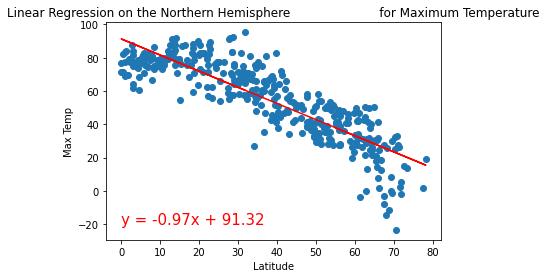

In [19]:
# linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\
                       for Maximum Temperature", "Max Temp", (0,-20))

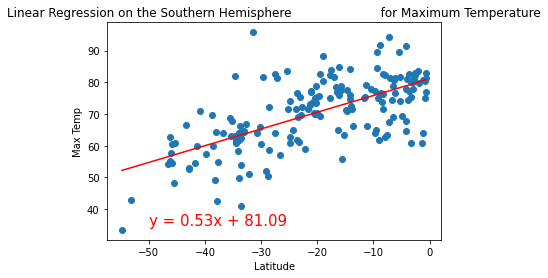

In [21]:
# linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\
                       for Maximum Temperature", "Max Temp", (-50,35))

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Humidity', '% Humidity',(40,20)

SyntaxError: unexpected EOF while parsing (<ipython-input-25-e4303626e7ba>, line 7)

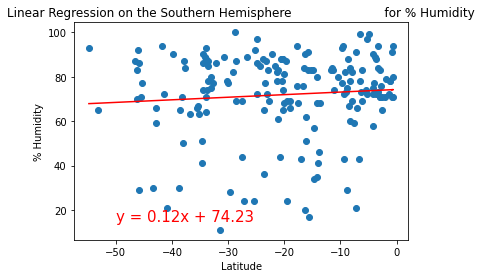

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Humidity', '% Humidity',(-50,15))

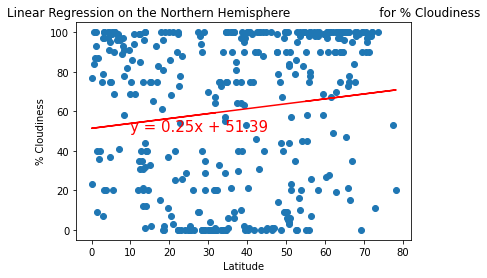

In [29]:
# linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\
                       for % Cloudiness", "% Cloudiness", (10,50))

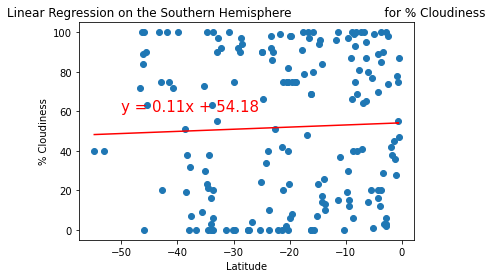

In [32]:
# linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                       for % Cloudiness", "% Cloudiness", (-50,60))

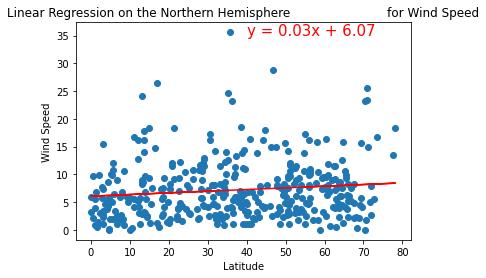

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

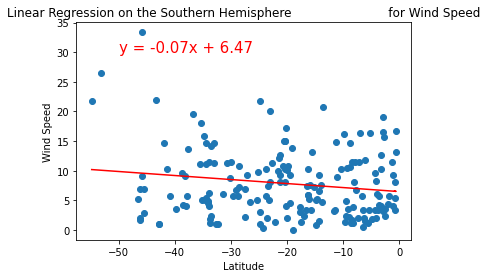

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))